<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#import_dataset">Import Stroke Prediction Dataset</a></li>
        <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>                      
    </ol>
</div>
<br>
<hr>

<div id="import_libraries"> 
    <h2>Import Libraries</h2>    
</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

<hr>
<div id="import_dataset"> 
    <h2>Import Stroke Prediction Dataset</h2>         
</div>

> Dataset Overview

The "Healthcare Stroke Prediction" dataset contains medical and demographic information of patients, aimed at predicting the likelihood of stroke occurrence. It includes features such as age, gender, health conditions, and lifestyle indicators.

> Project Objective

The goal of this project is to apply **association rule mining** to uncover meaningful patterns and co-occurring factors related to stroke risk. These insights can support healthcare decision-making and preventive strategies.

> Dataset Metadata

| Feature Name        | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| id                  | Unique identifier for each patient                                          |
| gender              | Gender of the patient (Male, Female, Other)                                 |
| age                 | Age of the patient                                                          |
| hypertension        | 1 if the patient has hypertension, 0 otherwise                              |
| heart_disease       | 1 if the patient has any heart disease, 0 otherwise                         |
| ever_married        | Marital status of the patient (Yes/No)                                     |
| work_type           | Type of occupation (e.g., Private, Self-employed, Govt job, etc.)           |
| Residence_type      | Urban or Rural residence                                                    |
| avg_glucose_level   | Average glucose level in blood                                              |
| bmi                 | Body Mass Index                                                             |
| smoking_status      | Smoking status (e.g., formerly smoked, never smoked, smokes, Unknown)       |
| stroke              | Target variable: 1 if the patient had a stroke, 0 otherwise                 |

In [2]:
# Load and display the dataset
url = "https://raw.githubusercontent.com/Ehsan-Behzadi/HealthCare_Insights_Association_Rule_Mining_for_Stroke_Risk_Factors/refs/heads/main/healthcare-dataset-stroke-data.csv"
df_stroke = pd.read_csv(url)
display(df_stroke.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
# Get the shape of the dataset, which returns the number of rows and columns
shape_of_the_dataset = df_stroke.shape
print("\nThe shape of the dataset -->", shape_of_the_dataset)


The shape of the dataset --> (43400, 12)


<hr>
<div id="eda"> 
    <h2>Exploratory Data Analysis (EDA)</h2>    
</div>
<div>
    <ol>
        <li><a href="#summary_statistics">Summary Statistics</a></li>        
        <li><a href="#detect_duplicate">Detect Duplicate Rows</a></li>
        <li><a href="#identify_missing_values">Identify Missing Values</a></li>       
        <li><a href="#univariate_analysis">Univariate Analysis</a></li>
        <li><a href="#bivariate_analysis">Bivariate Analysis</a></li>
        <li><a href="#correlation_analysis">Correlation Analysis</a></li>
        <li><a href="#detect_outliers">Detect Outliers</a></li>                              
    </ol>
</div>
<br>

<hr>
<div id="summary_statistics"> 
    <h2>Summary Statistics</h2>    
</div>

In [4]:
# Display a concise summary of the dataset
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset:\n')

data_information = df_stroke.info()
display(data_information)


More information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


None

In [5]:
# Show summary statistics for the dataset
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
# This includes count, unique(the number of unique values), top(the mode) and the frequency of the top value for object columns
print('\nThe dataset description:\n')

data_describe = df_stroke.describe(include = 'all')
display(data_describe)


The dataset description:



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


<hr>
<div id="detect_duplicate"> 
    <h2>Detect Duplicate Rows</h2>    
</div>

In [6]:
# Calculate the number of duplicate rows in the dataframe
Num_of_duplicate_rows = df_stroke.duplicated().sum()
print("\nThe number of duplicate rows -->", Num_of_duplicate_rows)


The number of duplicate rows --> 0


<hr>
<div id="identify_missing_values"> 
    <h2>Identify Missing Values</h2>    
</div>

In [7]:
# Check for missing values in the dataframe
isna = pd.DataFrame(df_stroke.isnull().sum(axis=0))
print(isna)

                       0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                 1462
smoking_status     13292
stroke                 0


In [8]:
# Calculate the percentage of missing values for each column
missing_percent = df_stroke.isnull().sum() / len(df_stroke) * 100

print(f"\nPercentage of missing values in each column:\n{missing_percent}")


Percentage of missing values in each column:
id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64


In [9]:
# Display rows with missing values  
rows_with_missing = df_stroke[df_stroke.isna().any(axis=1)]  
print("\nRows with missing values:")  
display(rows_with_missing)


Rows with missing values:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43388,31321,Female,64.0,1,0,Yes,Govt_job,Rural,228.43,NaN,smokes,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


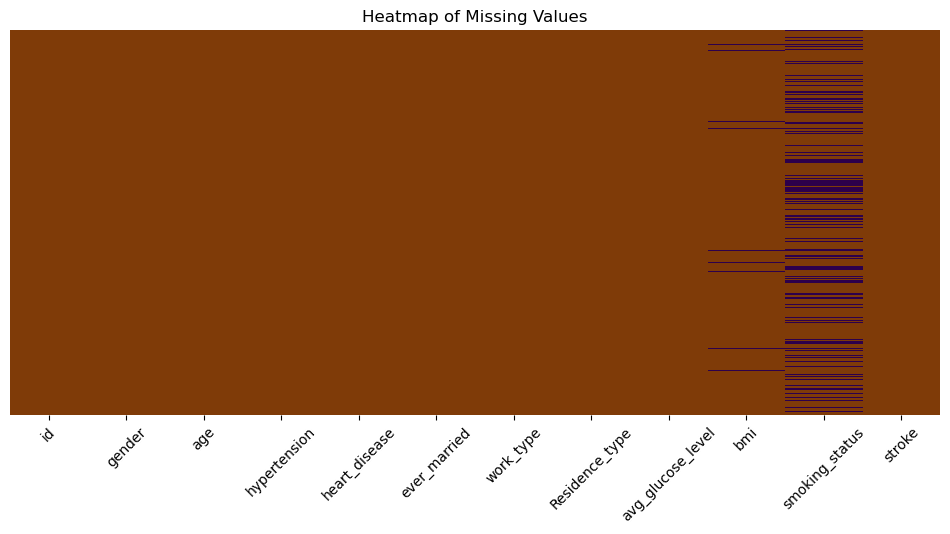

In [10]:
# Plot a heatmap to visualize missing values
# Set figure size
plt.figure(figsize=(12, 5))

# Plot the heatmap 
sns.heatmap(df_stroke.isna(), cbar=False, cmap="PuOr")

# Set titles and labels
plt.title("Heatmap of Missing Values")
plt.xticks(rotation=45)
plt.yticks([])
plt.ylabel('')
plt.show()

<hr>
<div id="univariate_analysis"> 
    <h2>Univariate Analysis</h2>    
</div>
<div>
    <ol>
        <li><a href="#numerical_features">UA for Numerical Features</a></li>
        <li><a href="#categorical_features">UA for Categorical Features</a></li>                
    </ol>
</div>
<br>

<div id="numerical_features"> 
    <h2>UA for Numerical Features</h2>    
</div>

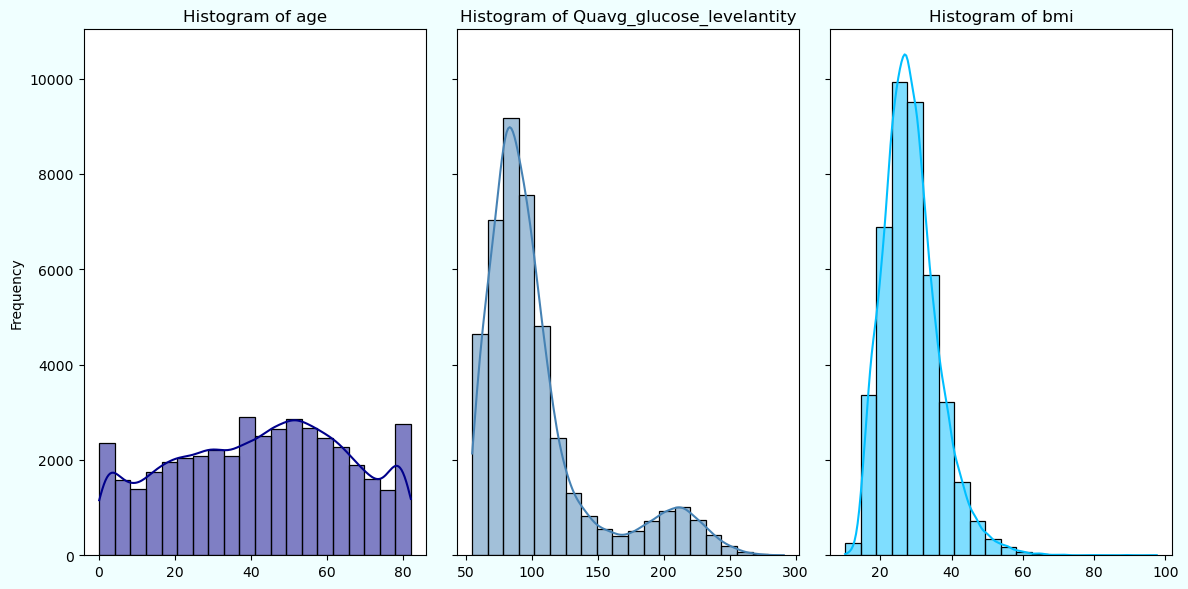

In [11]:
# Plot a histogram for numerical features
# Set up the figure with 1 row and 3 columns for histograms, sharing the y-axis  
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True, facecolor='azure')                      # Set the figure size (width, height)

# Create the first histogram for 'age' with KDE
sns.histplot(df_stroke['age'], bins=20, kde=True, color='darkblue', ax=axes[0])   
axes[0].set_title('Histogram of age')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')   

# Create the second histogram for 'avg_glucose_level' with KDE
sns.histplot(df_stroke['avg_glucose_level'], bins=20, kde=True, color='steelblue', ax=axes[1])   
axes[1].set_title('Histogram of Quavg_glucose_levelantity')
axes[1].set_xlabel('')
axes[1].set_ylabel('') 

# Create the third histogram for 'bmi' with KDE
sns.histplot(df_stroke['bmi'], bins=20, kde=True, color='deepskyblue', ax=axes[2])   
axes[2].set_title('Histogram of bmi')
axes[2].set_xlabel('')
axes[2].set_ylabel('') 
  
plt.tight_layout()           # Adjust the spacing between plots 
plt.show()   

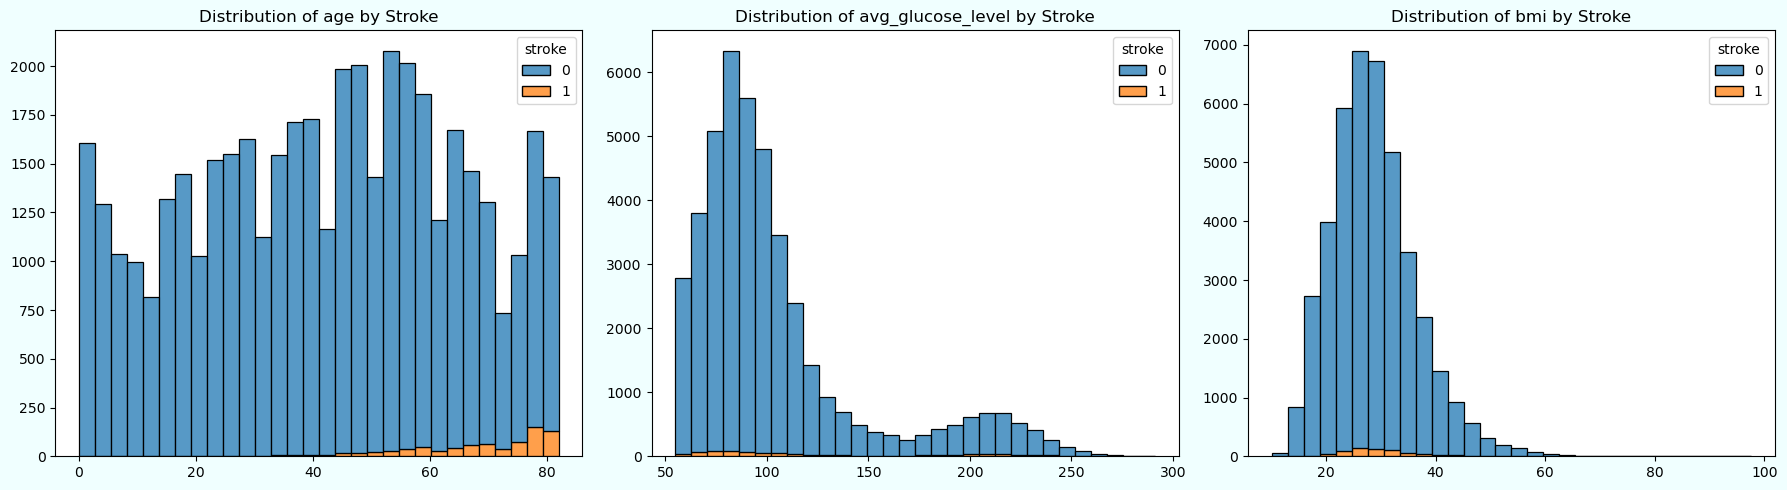

In [12]:
# Plot histograms for numerical features with hue='stroke'
# Set numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot histograms with hue='stroke'
plt.figure(figsize=(18, 5), facecolor='azure')
for i, feature in enumerate(numerical_features, 1):
    ax = plt.subplot(1, 3, i)
    sns.histplot(data=df_stroke, x=feature, hue='stroke', bins=30,             # Color by 'stroke'
                 palette='tab10', kde=False, multiple='stack', ax=ax)
    
    # Set title and labels
    ax.set_title(f'Distribution of {feature} by Stroke')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

<div id="categorical_features"> 
    <h2>UA for Categorical Features</h2>    
</div>

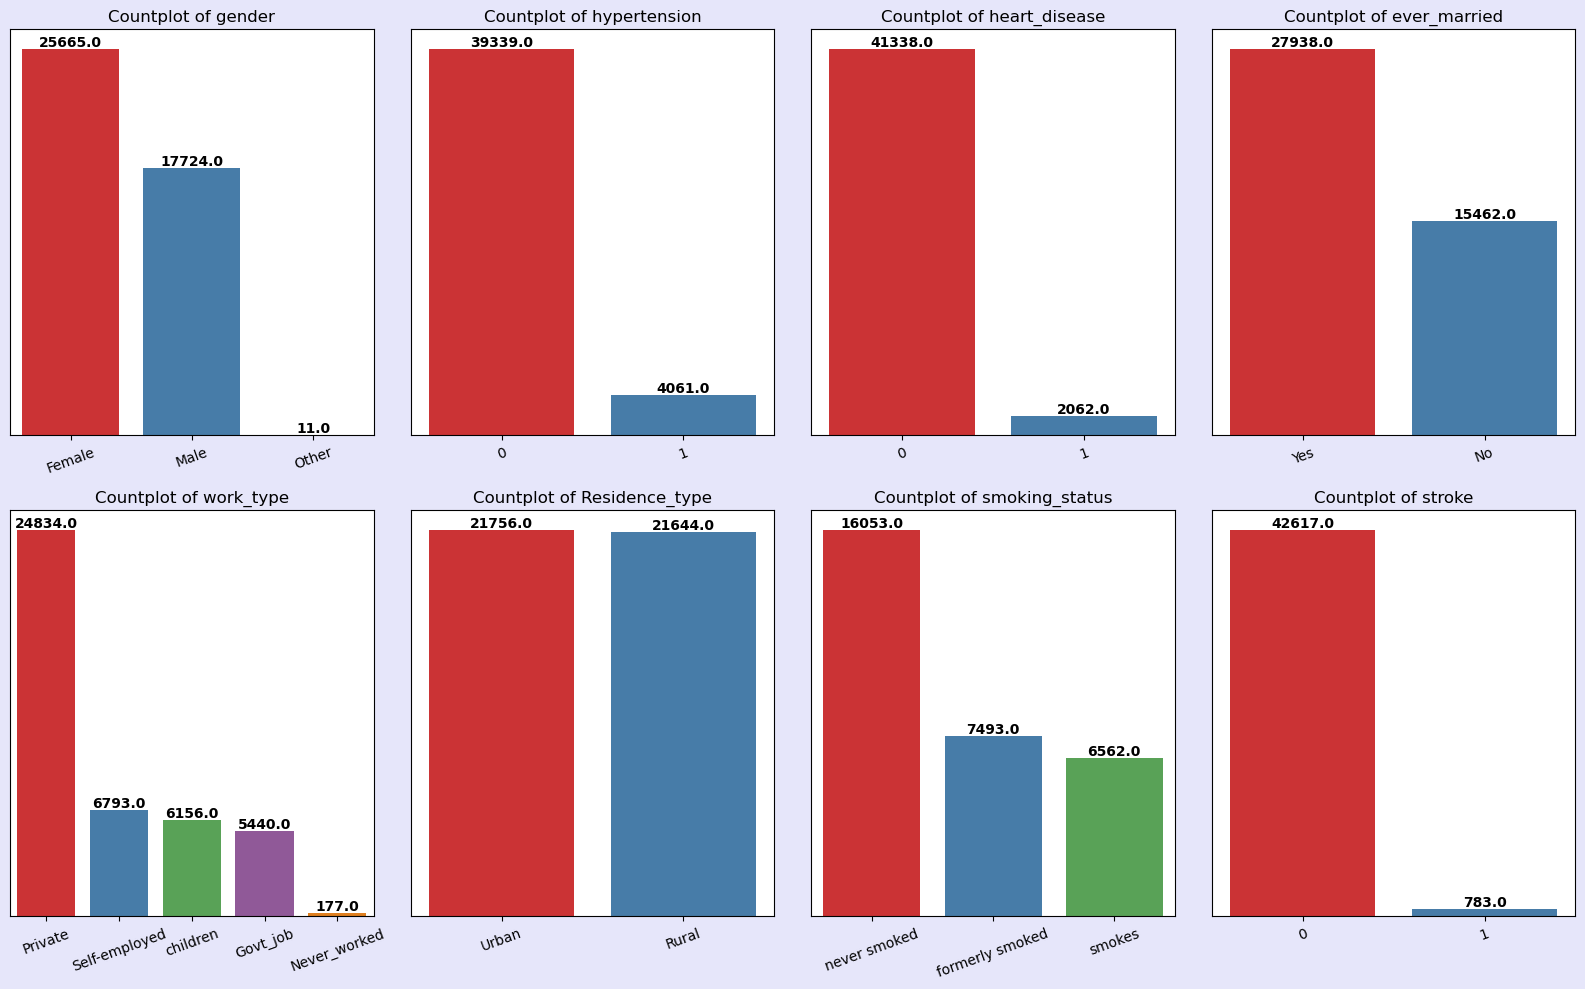

In [13]:
# Plot countplots for categorical features
# Set categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease','ever_married',
                        'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Plot countplots
plt.figure(figsize=(16, 10), facecolor='lavender')
for i, feature in enumerate(categorical_features, 1):
    ax = plt.subplot(2, 4, i)
    plot = sns.countplot(data=df_stroke, x=feature, palette='Set1', 
                         order=df_stroke[feature].value_counts().index, ax=ax)
    
    # Set title and labels 
    ax.set_title(f'Countplot of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='x', rotation=20)
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

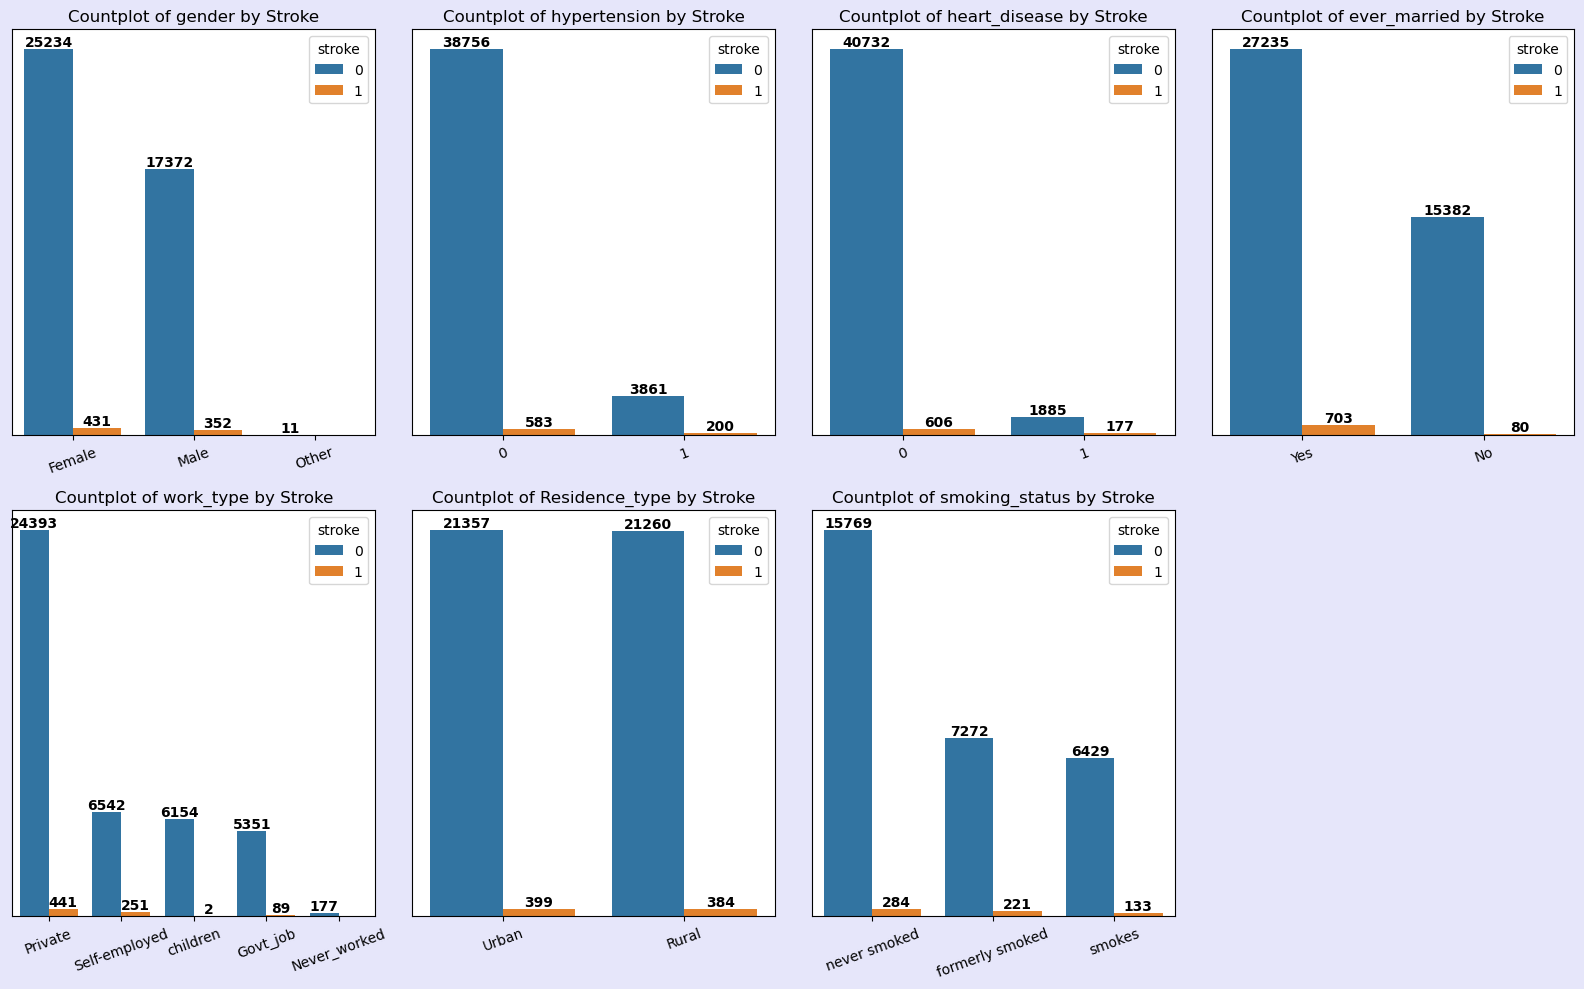

In [14]:
# Plot countplots for categorical features with hue='stroke'
# Set categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']

# Plot countplots with hue='stroke'
plt.figure(figsize=(16, 10), facecolor='lavender')
for i, feature in enumerate(categorical_features, 1):
    ax = plt.subplot(2, 4, i)
    plot = sns.countplot(data=df_stroke, x=feature, hue='stroke',               # Color by 'stroke'
                         palette='tab10', order=df_stroke[feature].value_counts().index, ax=ax)
    
    # Set title and labels
    ax.set_title(f'Countplot of {feature} by Stroke')
    plt.xlabel('')
    plt.ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='x', rotation=20)

    # Add value labels for hue
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

<hr>
<div id="bivariate_analysis"> 
    <h2>Bivariate Analysis</h2>    
</div>
<div>
    <ol>
        <li><a href="#numerical_features">BA for Numerical Features</a></li>
        <li><a href="#categorical_features">BA for Categorical Features</a></li>                
    </ol>
</div>
<br>

<div id="numerical_features"> 
    <h2>BA for Numerical Features</h2>    
</div>

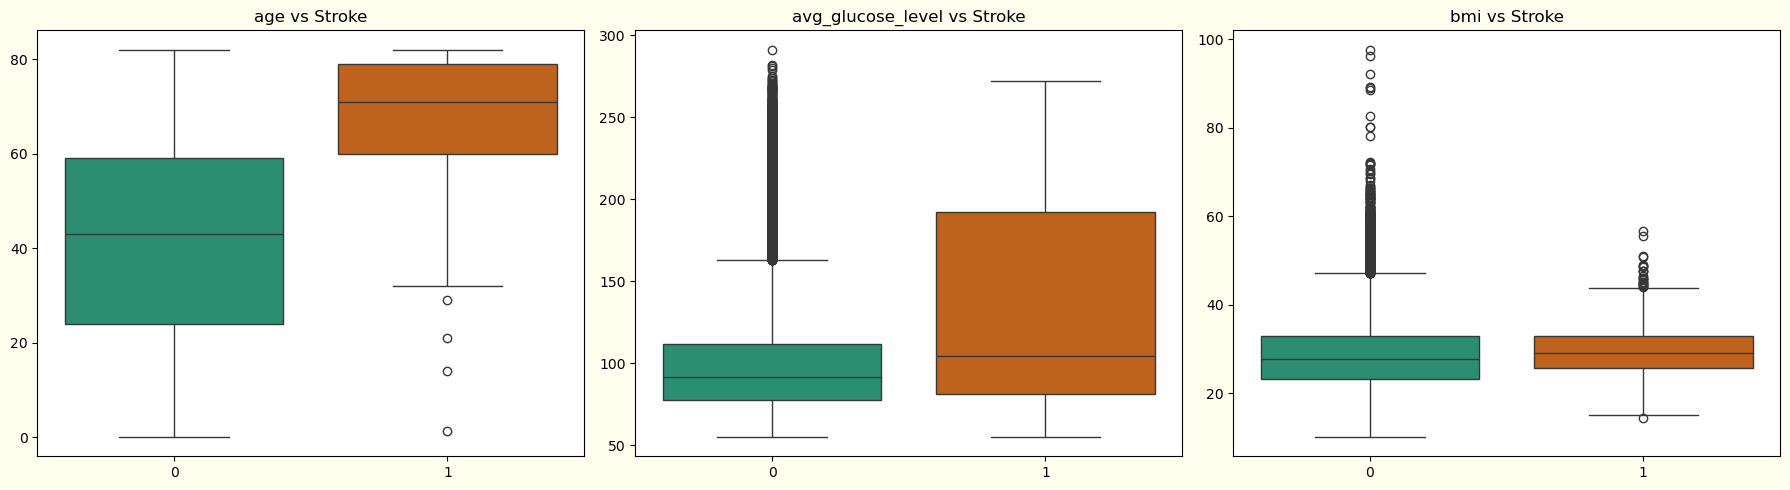

In [15]:
# Plot boxplots for numerical features vs 'stroke'
# Set numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot boxplots
plt.figure(figsize=(18, 5), facecolor='ivory')
for i, feature in enumerate(numerical_features, 1):
    ax = plt.subplot(1, 3, i)
    sns.boxplot(data=df_stroke, x='stroke', y=feature, palette='Dark2', ax=ax)
    
    # Set title and labels
    ax.set_title(f'{feature} vs Stroke')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

<div id="categorical_features"> 
    <h2>BA for Categorical Features</h2>    
</div>

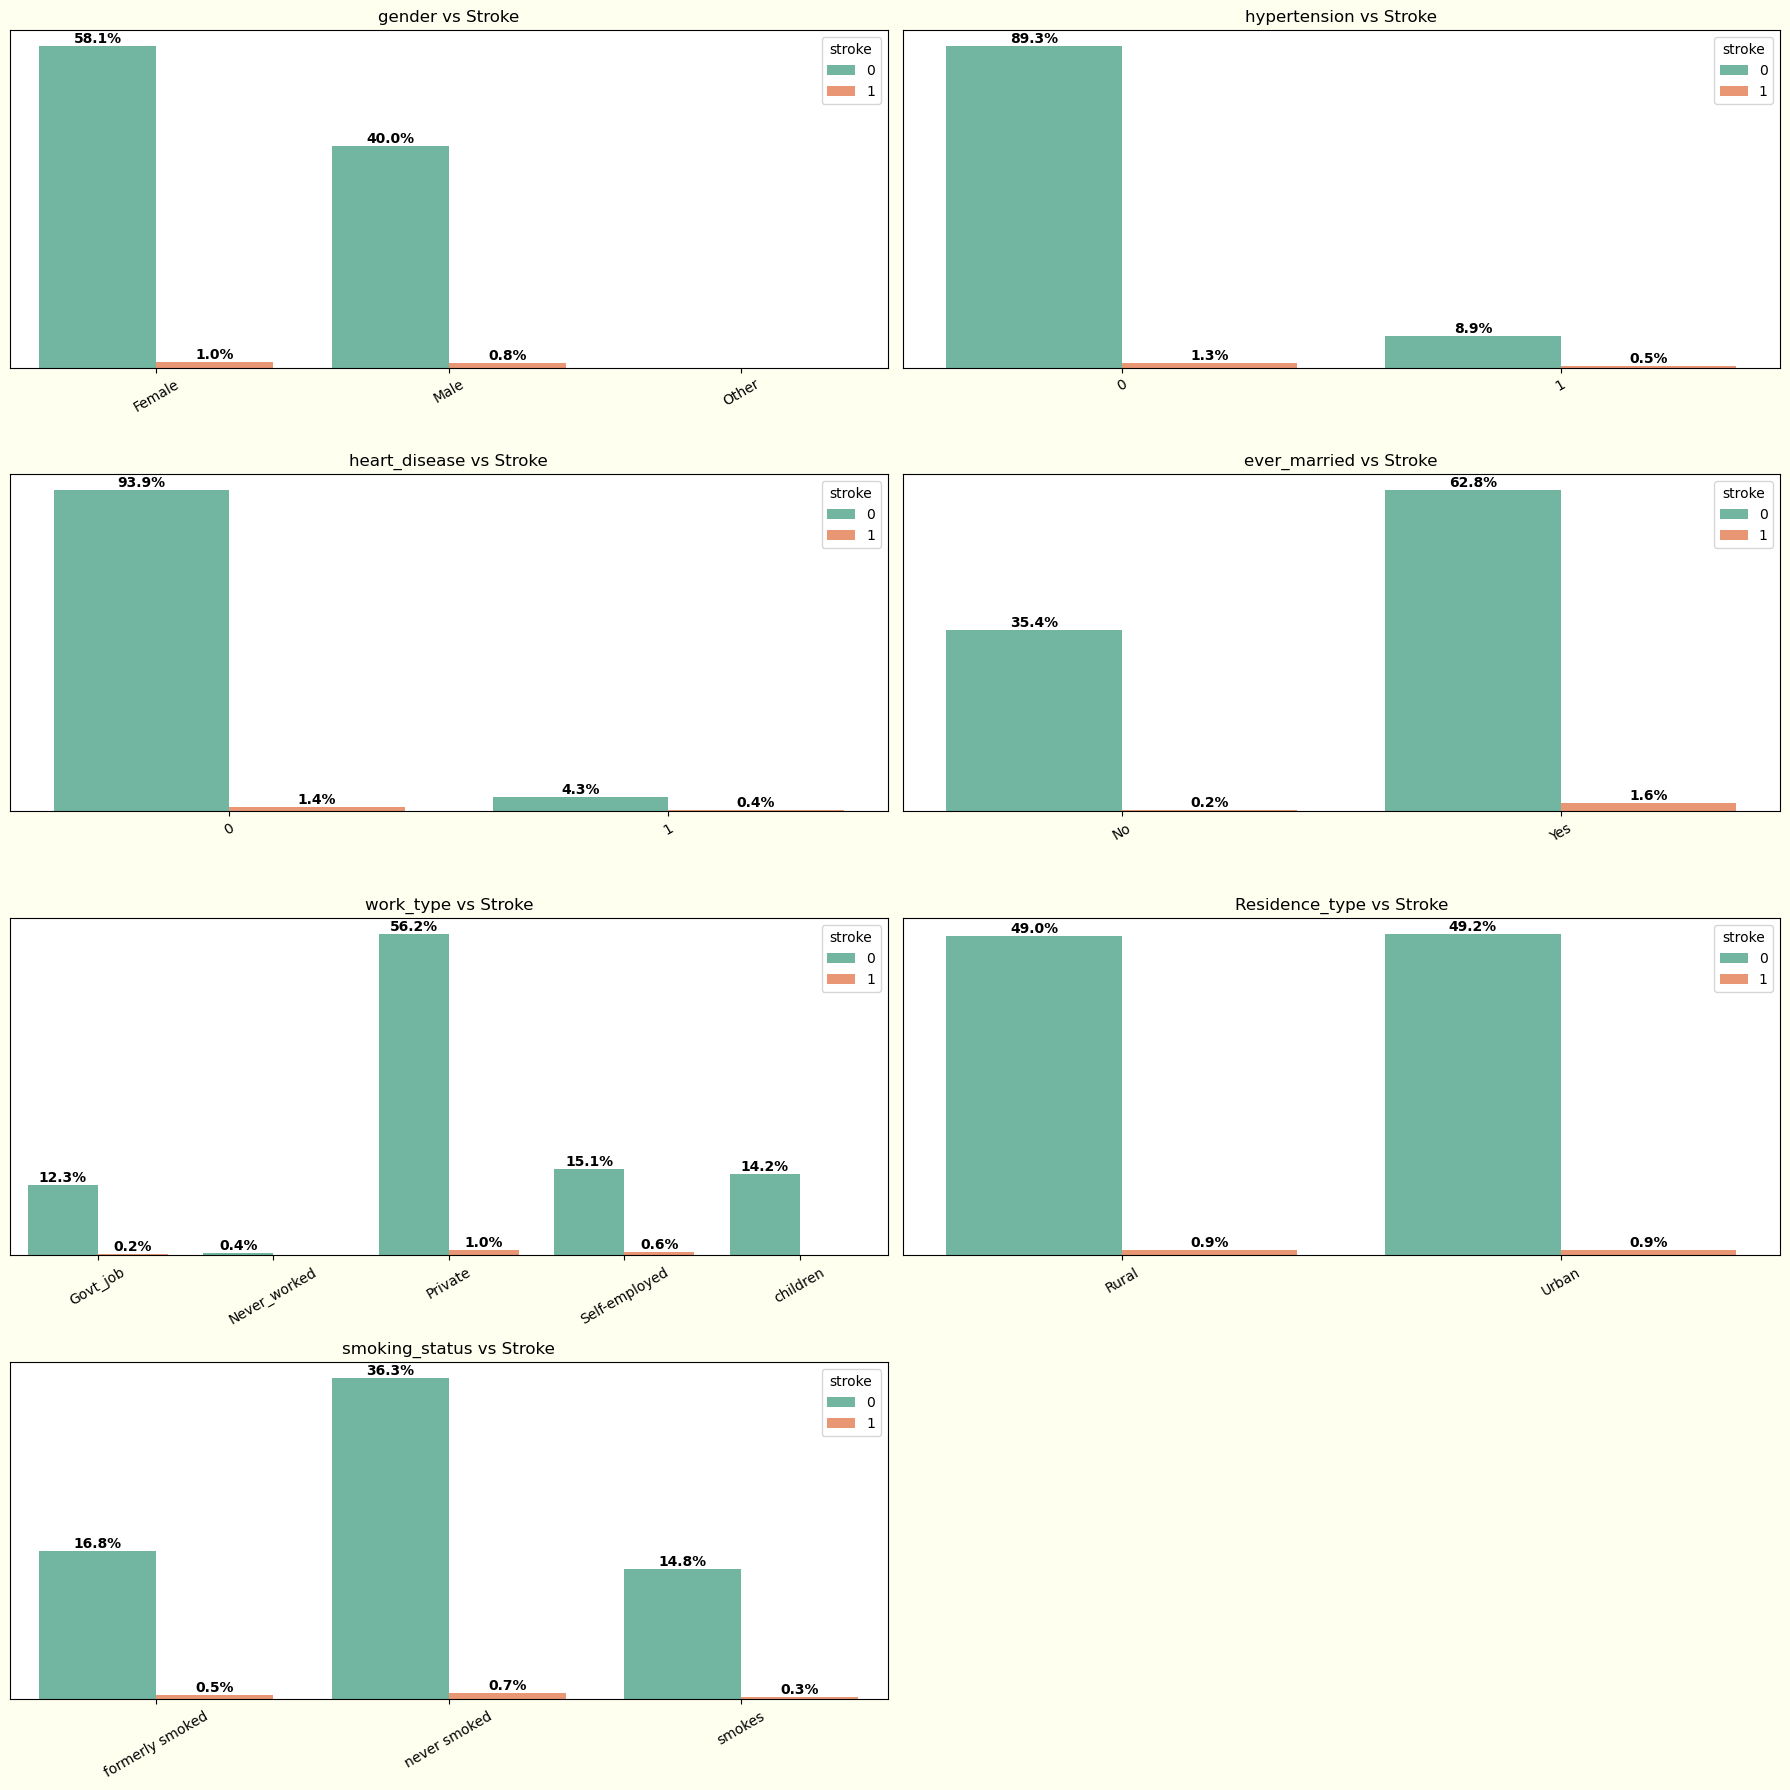

In [16]:
# Plot barplots for categorical features vs 'stroke'
# Set categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']

# Set figure
plt.figure(figsize=(18, 18), facecolor='ivory')
for i, feature in enumerate(categorical_features, 1):
    ax = plt.subplot(4, 2, i)
    
    # Group by feature and stroke, then count
    count_df = df_stroke.groupby([feature, 'stroke']).size().reset_index(name='count')
    
    # Calculate percent of total dataset
    total_count = len(df_stroke)
    count_df['percentage'] = (count_df['count'] / total_count * 100).round(1)
    
    # Plot barplots
    sns.barplot(data=count_df, x=feature, y='percentage', hue='stroke', palette='Set2', ax=ax)     # Color by 'stroke'
    ax.set_title(f'{feature} vs Stroke')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)
    ax.set_yticks([])

    # Add percentage labels on top
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

<hr>
<div id="correlation_analysis"> 
    <h2>Correlation Analysis</h2>    
</div>

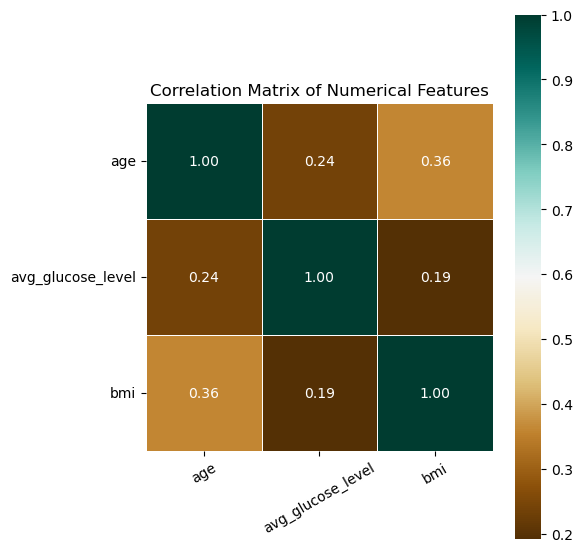

In [17]:
# Plot a heatmap to explore relationships between numeric variables
# Select numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Compute the correlation matrix
corr_matrix = df_stroke[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, 
            annot=True,         # Show correlation coefficients
            cmap='BrBG',        
            fmt=".2f",          # Format for values
            linewidths=0.5, 
            square=True)

# Set title and adjust layout
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

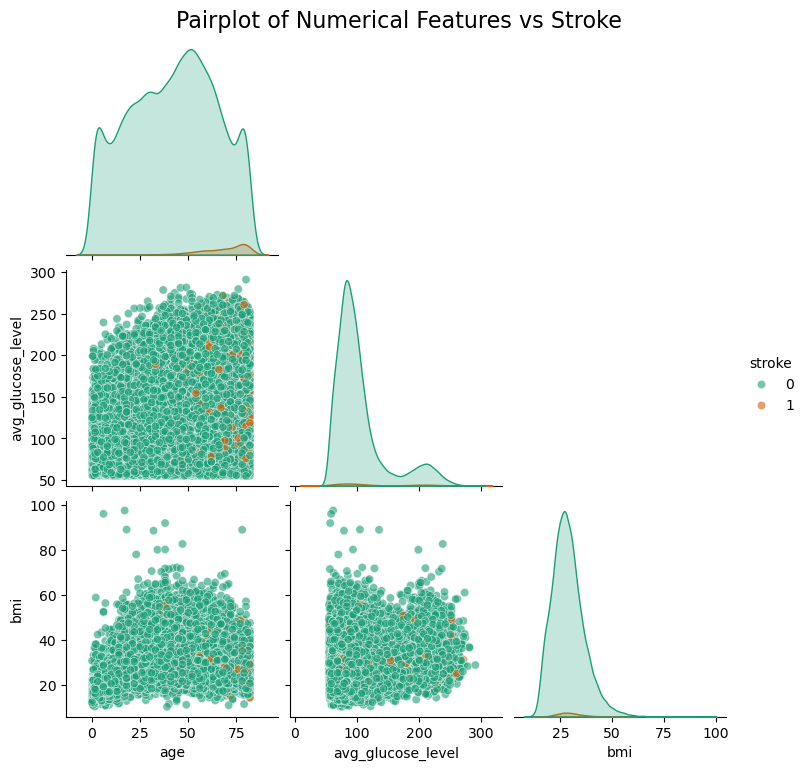

In [18]:
# Create pairplot to explore pairwise relationships
# Select numerical features including 'stroke'
pairplot_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Plot the pairplot
sns.pairplot(df_stroke[pairplot_features], 
             hue='stroke',             # Color by 'stroke'
             palette='Dark2',          
             corner=True,              # Plot only lower triangle
             plot_kws={'alpha': 0.6})  # Transparency for points

# Set title
plt.suptitle('Pairplot of Numerical Features vs Stroke', fontsize=16, y=1.02)
plt.show()

<hr>
<div id="detect_outliers"> 
    <h2>Detect Outliers</h2>    
</div>
<div>
    <ol>
        <li><a href="#boxplot">Boxplot</a></li>
        <li><a href="#iqr">IQR</a></li> 
        <li><a href="#dbscan">DBSCAN</a></li>
        <li><a href="#iqr_dbscan">Identify Common Outliers between IQR and DBSCAN</a></li>               
    </ol>
</div>
<br>

<div id="boxplot"> 
    <h2>Boxplot</h2>    
</div>

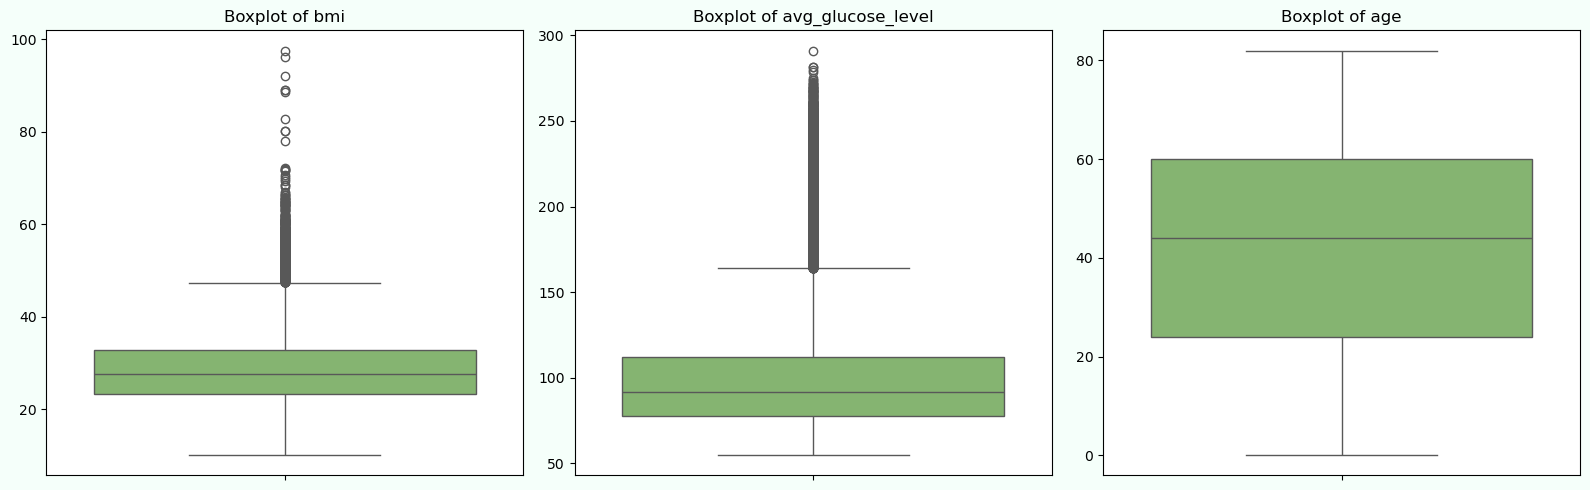

In [19]:
# Plot a boxplot to detect outliers in numerical features
# Define numerical features to analyze
numerical_features = ['bmi', 'avg_glucose_level', 'age']

# Set up the figure
plt.figure(figsize=(16, 5), facecolor='mintcream')
for i, feature in enumerate(numerical_features, 1):
    ax = plt.subplot(1, 3, i)
    
    # Create boxplot
    sns.boxplot(data=df_stroke, y=feature, ax=ax, palette='summer')
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

<div id="iqr"> 
    <h2>IQR</h2>    
</div>

In [20]:
# Detect univariate outliers using IQR for each numerical feature
# Iterate through each numerical feature in the list  
for feature in numerical_features:  
    # Calculate the first quartile (25th percentile) of the feature  
    Q1 = df_stroke[feature].quantile(0.25)  
    # Calculate the third quartile (75th percentile) of the feature  
    Q3 = df_stroke[feature].quantile(0.75)  
    
    # Compute the Interquartile Range (IQR) as the difference between Q3 and Q1  
    IQR = Q3 - Q1  

    # Determine the lower bound for identifying outliers  
    lower_bound = Q1 - 1.5 * IQR  
    # Determine the upper bound for identifying outliers  
    upper_bound = Q3 + 1.5 * IQR  

    # Identify outliers that fall below the lower bound or above the upper bound  
    outliers = df_stroke[(df_stroke[feature] < lower_bound) | (df_stroke[feature] > upper_bound)]  

    # Print the number of outliers detected for the current feature  
    print(f"\n{feature}: {len(outliers)} outliers detected\n")  


bmi: 888 outliers detected


avg_glucose_level: 4978 outliers detected


age: 0 outliers detected



<div id="dbscan"> 
    <h2>DBSCAN</h2>    
</div>

In [21]:
# Detect multivariate outliers using DBSCAN for numerical features
# Select numerical features for DBSCAN
features_for_dbscan = df_stroke[['age', 'avg_glucose_level', 'bmi']].copy()

# Handle potential missing values
features_for_dbscan.dropna(inplace=True)

# Scale features usind Standard Scaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_dbscan)

In [22]:
# Apply DBSCAN
db = DBSCAN(eps=1.2, min_samples=15).fit(features_scaled)

# Add labels to the DataFrame
features_for_dbscan['DBSCAN_label'] = db.labels_

# Create a new column 'dbscan_outlier' in the DataFrame to flag points identified as outliers by DBSCAN  
# Outliers are labeled with -1 in the 'DBSCAN_label' column
features_for_dbscan['dbscan_outlier'] = features_for_dbscan['DBSCAN_label'] == -1

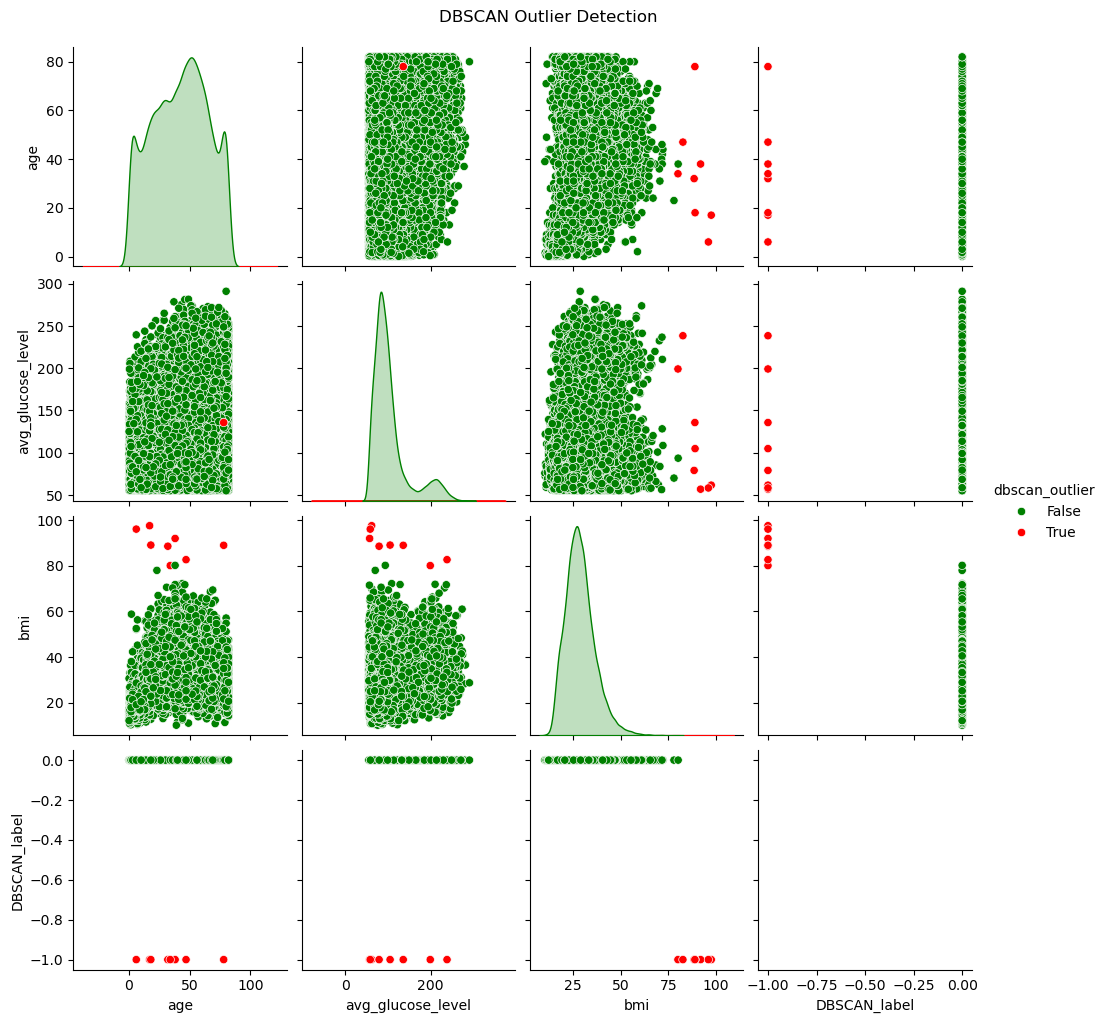

In [23]:
# Create a pairplot to visualize the relationships between features in the DataFrame  
# The hue parameter is set to the 'dbscan_outlier' column to color points based on whether they are outliers  
# Red represents outliers (True) and green represents inliers (False)
sns.pairplot(features_for_dbscan, hue='dbscan_outlier', palette={True: 'red', False: 'green'})
plt.suptitle('DBSCAN Outlier Detection', y=1.02)
plt.show()

In [24]:
# Count the total number of outliers by summing the values in the 'dbscan_outlier' column  
# Since True is treated as 1 and False as 0, this effectively counts how many outliers were detected 
dbscan_outliers = sum(features_for_dbscan['dbscan_outlier'])

# Print the total number of outliers detected by DBSCAN
print(f"\nNumber of outliers detected by DBSCAN: {dbscan_outliers}")


Number of outliers detected by DBSCAN: 8


<div id="iqr_dbscan"> 
    <h2>Identify Common Outliers between IQR and DBSCAN</h2>    
</div>

In [25]:
# Identify common outliers between IQR and DBSCAN
# Create a copy of the original DataFrame with selected numerical features
df_outlier_check = df_stroke[['age', 'avg_glucose_level', 'bmi']].copy()

# Detect univariate outliers using IQR for all 3 features and create a boolean mask
iqr_mask = pd.Series(False, index=df_outlier_check.index)

# Iterate through each numerical feature in the list
for feature in ['age', 'avg_glucose_level', 'bmi']:
    Q1 = df_outlier_check[feature].quantile(0.25)     # Calculate the first quartile
    Q3 = df_outlier_check[feature].quantile(0.75)     # Calculate the third quartile
    IQR = Q3 - Q1                    # Compute the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR     # Determine the lower bound for identifying outliers
    upper_bound = Q3 + 1.5 * IQR     # Determine the upper bound for identifying outliers

    # Combine masks using OR to flag all univariate outliers
    iqr_mask |= (df_outlier_check[feature] < lower_bound) | (df_outlier_check[feature] > upper_bound)

# Reindex the IQR mask to match the filtered (non-null) DBSCAN data
iqr_mask_filtered = iqr_mask.loc[features_for_dbscan.index]

In [26]:
# Identify common outliers (True in both IQR and DBSCAN)
common_outlier_mask = iqr_mask_filtered & features_for_dbscan['dbscan_outlier']

# Extract and display common outliers
common_outliers_df = features_for_dbscan[common_outlier_mask]

# Output results
print(f"\nNumber of common outliers detected by both IQR and DBSCAN: {len(common_outliers_df)}\n")
display(common_outliers_df)


Number of common outliers detected by both IQR and DBSCAN: 8



,age,avg_glucose_level,bmi,DBSCAN_label,dbscan_outlier
1913,17.0,61.67,97.6,-1,True
4026,38.0,56.90,92.0,-1,True
6340,18.0,104.89,89.1,-1,True
10322,6.0,58.33,96.1,-1,True
25996,32.0,79.09,88.6,-1,True
30650,34.0,199.13,80.1,-1,True
34824,47.0,238.47,82.7,-1,True
43087,78.0,135.73,89.0,-1,True


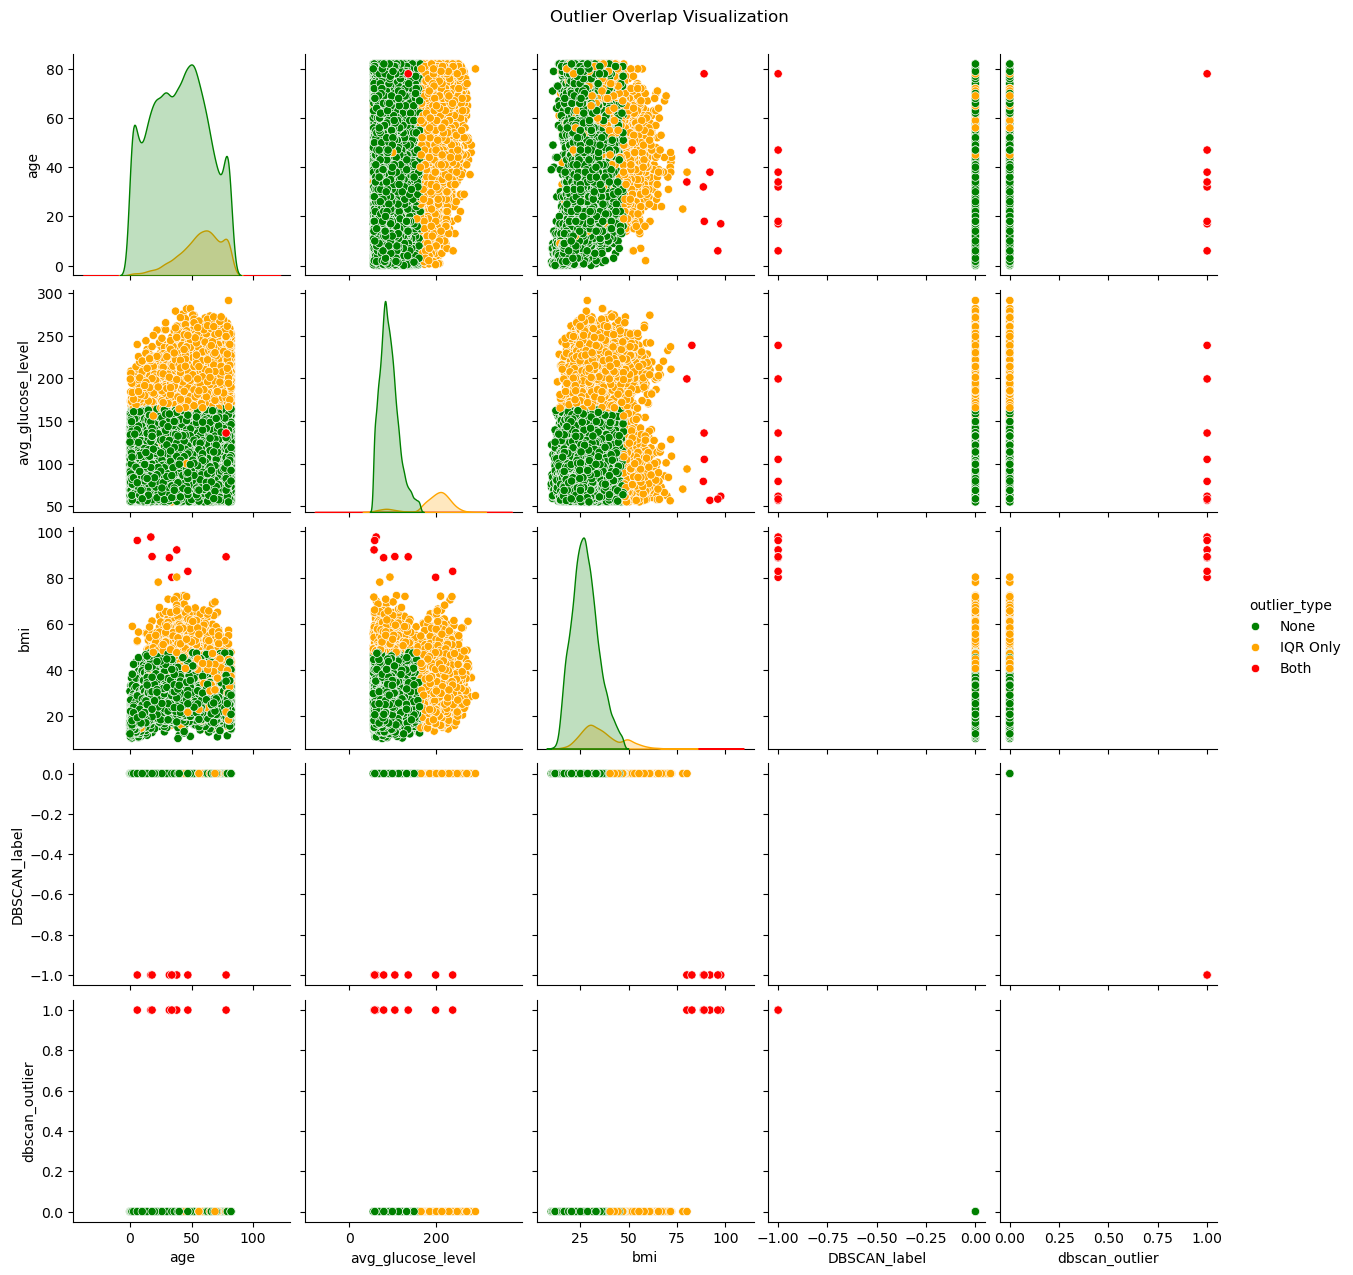

In [27]:
# Create a pairplot with common outliers highlighted
# Create a new column 'outlier_type' and set the default value to 'None' (meaning not an outlier by either method)
features_for_dbscan['outlier_type'] = 'None'

# Label data points detected as outliers only by IQR method
features_for_dbscan.loc[iqr_mask_filtered & ~features_for_dbscan['dbscan_outlier'], 'outlier_type'] = 'IQR Only'

# Label data points detected as outliers only by DBSCAN method
features_for_dbscan.loc[~iqr_mask_filtered & features_for_dbscan['dbscan_outlier'], 'outlier_type'] = 'DBSCAN Only'

# Label data points detected as outliers by both IQR and DBSCAN methods
features_for_dbscan.loc[common_outlier_mask, 'outlier_type'] = 'Both'

# Generate a pairplot to visualize relationships among features and highlight different outlier types
sns.pairplot(
    features_for_dbscan,
    hue='outlier_type',          # Color the points based on outlier type
    palette={
        'None': 'green',         # Normal data
        'IQR Only': 'orange',    # Outliers by IQR only
        'DBSCAN Only': 'blue',   # Outliers by DBSCAN only
        'Both': 'red'            # Outliers by both methods
    }
)

# Set a title 
plt.suptitle('Outlier Overlap Visualization', y=1.02) 
plt.show()

<hr>
<div id="pre-processing"> 
    <h2>Pre-processing</h2>    
</div>
<div>
    <ol>
        <li><a href="#convert_data_types">Convert Data Types</a></li>        
        <li><a href="#handle_missing_values">Handle Missing Values</a></li>        
        <li><a href="#remove_outliers">Remove Outliers</a></li>               
        <li><a href="#feature_discretization">Feature Discretization</a></li>  
        <li><a href="#one_hot_encoding">One_hot Encoding</a></li>     
    </ol>
</div>
<br>

<hr>
<div id="convert_data_types"> 
    <h2>Convert Data Types</h2>    
</div>

In [28]:
# Convert 'hypertension' column to object
df_stroke['hypertension'] = df_stroke['hypertension'].astype('object')

# Convert 'heart_disease' column to object
df_stroke['heart_disease'] = df_stroke['heart_disease'].astype('object')

# Convert 'heart_disease' column to object
df_stroke['stroke'] = df_stroke['stroke'].astype('object')

# Display the data types for each column after conversion
print("\nData types after conversion:")
display(df_stroke.dtypes)


Data types after conversion:


id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

<hr>
<div id="handle_missing_values"> 
    <h2>Handle Missing Values</h2>    
</div>
<div>
    <ol>
        <li><a href="#median">Median Imputation</a></li>
        <li><a href="#unknown">Filling Categorical Nulls with 'Unknown'</a></li>                
    </ol>
</div>
<br>

<div id="median"> 
    <h2>Median Imputation</h2>    
</div>

In [29]:
# Perform median imputation for 'bmi'
df_stroke['bmi'].fillna(df_stroke['bmi'].median(), inplace=True)

<div id="unknown"> 
    <h2>Filling Categorical Nulls with 'Unknown'</h2>    
</div>

In [30]:
# Fill missing values in 'smoking_status' with a new category 'Unknown'  
df_stroke['smoking_status'].fillna('Unknown', inplace=True)

**Drop 'id' column**

In [31]:
# Remove the 'id' from the DataFrame 
df_stroke = df_stroke.drop('id', axis=1)

# Display the DataFrame after handling missing values and dropping the column   
display(df_stroke.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


<div id="remove_outliers"> 
    <h2>Remove Outliers</h2>    
</div>

In [32]:
# Drop common outliers (in both IQR and DBSCAN) from the main dataset
df_stroke.drop(index=common_outliers_df.index, inplace=True)

# Reset the index after dropping to keep it clean
df_stroke.reset_index(drop=True, inplace=True)

In [33]:
# Output the shape of the dataset after outlier detection
print(f'Dataset shape after removing outliers: {df_stroke.shape}')

Dataset shape after removing outliers: (43392, 11)


<div id="feature_discretization"> 
    <h2>Feature Discretization</h2>    
</div>

In [34]:
# Convert continuous feature into discrete intervals
# Discretize 'age' feature
def categorize_age(age):
    if age <= 18:
        return 'Child'            # 0-18 years
    elif age <= 35:
        return 'Young Adult'      # 19-35 years
    elif age <= 55:
        return 'Adult'            # 36-55 years
    else:
        return 'Senior'           # 56+ years

# Apply the function to create a new 'age_group' column
df_stroke['age_group'] = df_stroke['age'].apply(categorize_age)

In [35]:
# Discretize 'avg_glucose_level' feature
def categorize_glucose(glucose):
    if glucose < 100:
        return 'Normal'           # Glucose level < 100
    elif glucose <= 125:
        return 'Pre-diabetes'     # Glucose level between 100 and 125
    else:
        return 'Diabetes'         # Glucose level > 125

# Apply the function to create a new 'glucose_group' column
df_stroke['glucose_group'] = df_stroke['avg_glucose_level'].apply(categorize_glucose)

In [36]:
# Discretize 'bmi' feature
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'      # BMI < 18.5
    elif bmi < 25:
        return 'Normal'           # BMI between 18.5 and 24.9
    elif bmi < 30:
        return 'Overweight'       # BMI between 25 and 29.9
    else:
        return 'Obese'            # BMI 30 or higher

# Apply the function to create a new 'bmi_group' column
df_stroke['bmi_group'] = df_stroke['bmi'].apply(categorize_bmi)

In [37]:
# Remove main columns -> 'age', 'avg_glucose_level', 'bmi'
df_stroke.drop(['age', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)

print('Dataframe after discretization:')
display(df_stroke.head())

Dataframe after discretization:


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_group,glucose_group,bmi_group
0,Male,0,0,No,children,Rural,Unknown,0,Child,Normal,Underweight
1,Male,1,0,Yes,Private,Urban,never smoked,0,Senior,Normal,Obese
2,Female,0,0,No,Private,Urban,Unknown,0,Child,Pre-diabetes,Underweight
3,Female,0,0,Yes,Private,Rural,formerly smoked,0,Senior,Normal,Obese
4,Male,0,0,No,Never_worked,Rural,Unknown,0,Child,Diabetes,Normal


<div id="one_hot_encoding"> 
    <h2>One-hot Encoding</h2>    
</div>

In [38]:
# One-Hot Encoding for all categorical features 
# Apply one-hot encoding using pd.get_dummies
# pd.get_dummies() converts categorical variables into dummy/indicator variables
# 'drop_first=False' means do not drop the first category of each variable
df_stroke_encoded = pd.get_dummies(df_stroke, drop_first=False)

# Convert boolean columns to integers (0/1)
df_stroke_encoded = df_stroke_encoded.astype(int)

In [ ]:
# Display the shape of the new DataFrame
print(f"\nShape of the dataset after one-hot encoding: {df_stroke_encoded.shape}\n")

# Display the encoded DataFrame
df_stroke_encoded.head()  


Shape of the dataset after one-hot encoding: (43392, 33)



,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,...,age_group_Child,age_group_Senior,age_group_Young Adult,glucose_group_Diabetes,glucose_group_Normal,glucose_group_Pre-diabetes,bmi_group_Normal,bmi_group_Obese,bmi_group_Overweight,bmi_group_Underweight
0,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
